In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

<h1>Analysis/prepwork</h1>

Read in data

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Check for missing values

In [3]:
# Check for missing data
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Looks like there are no missing values. Lets now make the species column and make it a numbered categorical variable for ease of processing

In [4]:
conditions = [
    df['Species'] == 'Iris-setosa',
    df['Species'] == 'Iris-versicolor',
    df['Species'] == 'Iris-virginica',
    
]
choices = [0,1,2]
df['SpeciesCat']= np.select(conditions, choices)

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SpeciesCat
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


Let's take a look at some graphs, and how the categories of flowers correspond to the covariates

In [6]:
# First, take out the covariates.
seto = df.loc[(df['SpeciesCat']==0)]
vers = df.loc[(df['SpeciesCat']==1)]
virg = df.loc[(df['SpeciesCat']==2)]

# Check numbers are right
print(len(seto) + len(vers) + len(virg)  - len(df))

0


In [7]:
# Create some arrays to plot the data with.
# Seto
seto_sepal_len = seto['SepalLengthCm'].to_numpy()
seto_sepal_width = seto['SepalWidthCm'].to_numpy()
seto_petal_len = seto['PetalLengthCm'].to_numpy()
seto_petal_width = seto['PetalWidthCm'].to_numpy()

# Vers
vers_sepal_len = vers['SepalLengthCm'].to_numpy()
vers_sepal_width = vers['SepalWidthCm'].to_numpy()
vers_petal_len = vers['PetalLengthCm'].to_numpy()
vers_petal_width = vers['PetalWidthCm'].to_numpy()

# Virg
virg_sepal_len = virg['SepalLengthCm'].to_numpy()
virg_sepal_width = virg['SepalWidthCm'].to_numpy()
virg_petal_len = virg['PetalLengthCm'].to_numpy()
virg_petal_width = virg['PetalWidthCm'].to_numpy()

Now, let's plot a scatter plot.

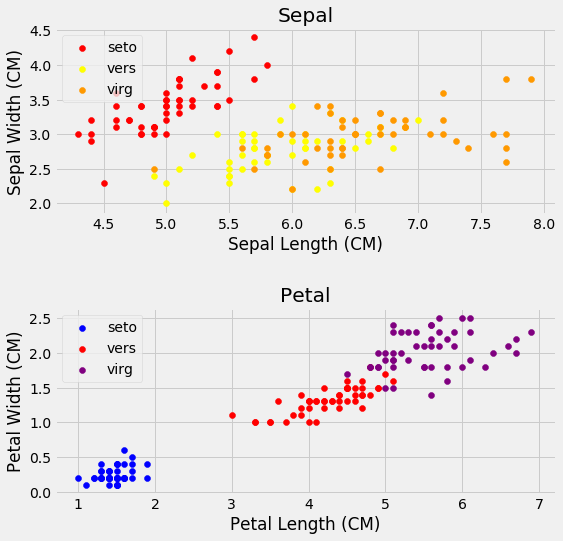

In [8]:
plt.style.use('fivethirtyeight')
fig, (ax_sepal, ax_petal) = plt.subplots(nrows = 2, figsize = (8,8))
plt.subplots_adjust(hspace = .5)

ax_sepal.scatter(seto_sepal_len, seto_sepal_width, color = '#ff0000', label = 'seto')
ax_sepal.scatter(vers_sepal_len, vers_sepal_width, color = '#ffff00', label = 'vers')
ax_sepal.scatter(virg_sepal_len, virg_sepal_width, color = '#ff9900', label = 'virg')
ax_sepal.set_title('Sepal')
ax_sepal.set_xlabel('Sepal Length (CM)')
ax_sepal.set_ylabel('Sepal Width (CM)')

ax_petal.scatter(seto_petal_len, seto_petal_width, color = 'blue', label = 'seto')
ax_petal.scatter(vers_petal_len, vers_petal_width, color = 'red', label = 'vers')
ax_petal.scatter(virg_petal_len, virg_petal_width, color = 'purple', label = 'virg')
ax_petal.set_title('Petal')
ax_petal.set_xlabel('Petal Length (CM)')
ax_petal.set_ylabel('Petal Width (CM)')

ax_sepal.legend()
ax_petal.legend()
plt.show()

<h1> More analysis</h1>

As we can see, it looks like the data in the petal graph is more linearly correlated. Lets take a look.

In [9]:
sepal_corr_coef = np.corrcoef(df['SepalLengthCm'], df['SepalWidthCm'])
petal_corr_coef = np.corrcoef(df['PetalLengthCm'], df['PetalWidthCm'])
print('Sepal Correlation: {}\nPetal Correlation: {}'.format(sepal_corr_coef[0,1], petal_corr_coef[0,1]))

Sepal Correlation: -0.10936924995064935
Petal Correlation: 0.962757097050966


In fact, the correlation using petal calculations is much higher, and indicates a very positive linear correlation

<h1>K-Means</h1>

Now, lets perform k-means clustering on the data, one for sepal and one for petal.

In [10]:
# Want to do k means on SepalLength/SepalWidth and PetalLength/PetalWidth
# First, perform mean normalization + feature scaling to normalize datanum_examples = len(df)
# prep variables for normalize
num_examples = len(df)
sums = np.sum(df)
maxs = df.max()
mins = df.min()

In [11]:
# # Normalize
for i in range(1,5):
    df.iloc[:,i] = (df.iloc[:,i] - (sums[i]/num_examples)) / (maxs[i] - mins[i])
   
    
# df.head()

Now that our data is normalized for potentially faster and more accurate calculations, we can proceed with model creation and training.
<br>
For the sake of reproduceability, I have set my random state to 0

In [12]:
# Now we can start KM
# Note that since we want to predict 3 categories, 3 Clusters is what we need
sepal_model = KMeans(n_clusters = 3, random_state = 0)
petal_model = KMeans(n_clusters = 3, random_state = 0)

Model training

In [13]:
# Predict the clusters
sepal_data = ['SepalLengthCm', 'SepalWidthCm']
petal_data = ['PetalLengthCm', 'PetalWidthCm'] 
sepal_pred = sepal_model.fit_predict(df[sepal_data])
petal_pred = petal_model.fit_predict(df[petal_data])

Addind the model results to the df, and touch-ups

In [14]:
# Put the predictions into the df
df['SepalCluster'] = sepal_pred
df['PetalCluster'] = petal_pred

# Since I fixed my random_state, I know that the '1' and '2' is swapped
sepal_conditions = [
    df['SepalCluster'] == 0,
    df['SepalCluster'] == 2,
    df['SepalCluster'] == 1,
    
]
petal_conditions = [
    df['PetalCluster'] == 0,
    df['PetalCluster'] == 2,
    df['PetalCluster'] == 1,
    
]
choices = [0,1,2]
df['SepalCluster']= np.select(sepal_conditions, choices)
df['PetalCluster']= np.select(petal_conditions, choices)

<h1> Post modelling results and analysis</h1>

Let's take a look at the f1 score

In [15]:
# Get data prepped for f1 score by converting to array
sepal_cluster = df.SepalCluster.to_numpy()
petal_cluster = df.PetalCluster.to_numpy()
true_cluster = df.SpeciesCat.to_numpy()

In [16]:
# Just f1 Score
sepal_f1 = f1_score(true_cluster, sepal_cluster, average = 'macro')
petal_f1 = f1_score(true_cluster, petal_cluster, average = 'macro')
print('Sepal clustering f1 score: {}\nPetal clustering f1 score:{}'.format(round(sepal_f1,3), round(petal_f1,3)))

Sepal clustering f1 score: 0.801
Petal clustering f1 score:0.96


As we guessed, the score for the petal model is significantly higher than that of the sepal one. Lets also take a look at the clusters created by the model

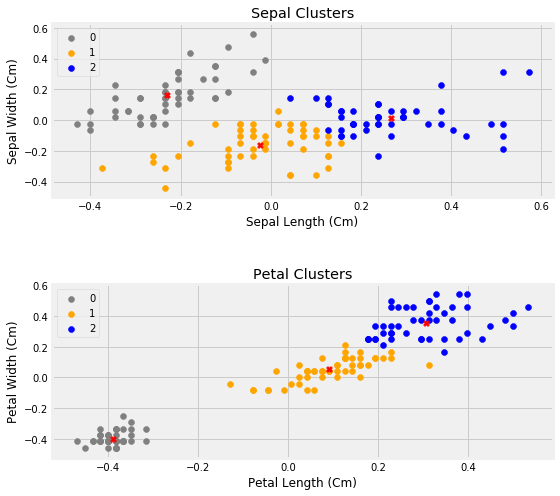

In [17]:
%matplotlib inline
fig, (ax_sepal_c, ax_petal_c) = plt.subplots(nrows = 2, figsize = (8,8))
plt.subplots_adjust(hspace = .5)

# Plot Sepal Clusterings
sdf0 = df[df.SepalCluster==0]
sdf1 = df[df.SepalCluster==1]
sdf2 = df[df.SepalCluster==2]
pdf0 = df[df.PetalCluster==0]
pdf1 = df[df.PetalCluster==1]
pdf2 = df[df.PetalCluster==2]

# Plot Sepal Clusterings
ax_sepal_c.set_title('Sepal Clusters')
ax_sepal_c.set_xlabel('Sepal Length (Cm)', fontsize = 'large')
ax_sepal_c.set_ylabel('Sepal Width (Cm)')

ax_sepal_c.scatter(sdf0.SepalLengthCm, sdf0.SepalWidthCm, color = 'gray', label = 0)
ax_sepal_c.scatter(sdf1.SepalLengthCm, sdf1.SepalWidthCm, color = 'orange', label = 1)
ax_sepal_c.scatter(sdf2.SepalLengthCm, sdf2.SepalWidthCm, color = 'blue', label = 2)
ax_sepal_c.scatter(sepal_model.cluster_centers_[:,0],sepal_model.cluster_centers_[:,1], color = 'red', marker = 'X')

# Plot Petal Clusterings
ax_petal_c.set_title('Petal Clusters')
ax_petal_c.set_xlabel('Petal Length (Cm)')
ax_petal_c.set_ylabel('Petal Width (Cm)')

ax_petal_c.scatter(pdf0.PetalLengthCm, pdf0.PetalWidthCm, color = 'gray', label = 0)
ax_petal_c.scatter(pdf1.PetalLengthCm, pdf1.PetalWidthCm, color = 'orange', label = 1)
ax_petal_c.scatter(pdf2.PetalLengthCm, pdf2.PetalWidthCm, color = 'blue', label = 2)
ax_petal_c.scatter(petal_model.cluster_centers_[:,0],petal_model.cluster_centers_[:,1], color = 'red', marker = 'X')

ax_sepal_c.legend()
ax_petal_c.legend()
plt.show()

As compared to the above graphs, the cluster 'colors' are much similar in the Petal covariates compared to the Sepal covariates

Below is the full classification report, once again providing evidence that petals likely result in better predicted clusters.

In [18]:
# Full Classification Report
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
print('Sepal Cluster Classification Report\n\n' + 
      classification_report(true_cluster, sepal_cluster, target_names=classes) + '\n\n')
print('----------------------------------------------------------')
print('\n\nPetal Cluster Classification Report\n\n' + 
      classification_report(true_cluster, petal_cluster, target_names=classes))

Sepal Cluster Classification Report

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.98      0.99        50
Iris-versicolor       0.69      0.74      0.71        50
 Iris-virginica       0.72      0.68      0.70        50

       accuracy                           0.80       150
      macro avg       0.80      0.80      0.80       150
   weighted avg       0.80      0.80      0.80       150



----------------------------------------------------------


Petal Cluster Classification Report

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.92      0.96      0.94        50
 Iris-virginica       0.96      0.92      0.94        50

       accuracy                           0.96       150
      macro avg       0.96      0.96      0.96       150
   weighted avg       0.96      0.96      0.96       150

